# PRML Introduction
## 0. Notation
<ul>
<li>lower case bold Roman letters: column vector $\boldsymbol{x}$ row vector $\boldsymbol{x}^T$ (T denotes the transpose of a matrix or vector)</li>
<li>Uppercase bold Romen letters: matrix $\boldsymbol{M}$</li>
<li>The notation $(w_1, \dots, w_M)$ denotes a row vector with $M$ elements, while $\boldsymbol{w} = (w_1, \dots, w_M)^T$ denotes a column vector</li>
<li> closed interval: $[a,b]$ </li>
<li> half open interval: $[a,b)$ </li>
<li> open interval: $(a,b)$ </li>
    <li> $M \times M$ identity matrix: $\boldsymbol{I}_M$ </li>
    <li> a functional: $f[y]$, where $y(x)$ is some function. </li>
    <li> $g(x) = O(f(x))$ denotes that $|\frac{f(x)}{g(x)}|$ is bounded as $x \rightarrow \infty$. For instance if $g(x) = 3x^2 + 2$, then $g(x) = O(x^2)$</li>
    <li>The expectation of a function $f(x,y)$ with respect to a random variable $x$ is denoted by $\mathbb{E}_x[f(x,y)]$. If there is no ambiguity, the form could be simplified by omitting the suffix. For conditional expectation, $\mathbb{E}_x[f(x)|z]$, when the distribution of $x$ is conditioned on another variable $z$.</li>
</ul>

### About matrix
If we have $N$ values $\boldsymbol{x}_1, \dots, \boldsymbol{x}_N$ of a D-dimensional vector $\boldsymbol{x} = (x_1, \dots, x_D)^T$, we can combine the observations into a data matrix $\boldsymbol{X}$ in which the $n$th row of $\boldsymbol{X}$ corresponds to the row vector $\boldsymbol{x}_n^T$. Thus, the $n,i$ element of $\boldsymbol{X}$ corresponds to the $i$th element of the $n$th observation $\boldsymbol{x}_n$

## 1. Chapter 1 Introduction
#### what is pattern and pattern recognition?
Pattern in this book may indicate the emprirical laws, regularities, features, characteristics from data. So pattern recognition means to find patterns from data.

#### what is data?
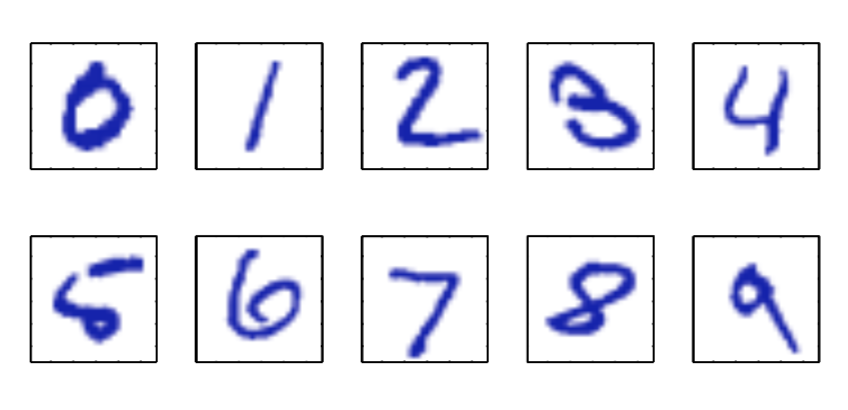
Each digits corresponds to a $28 \times 28$ pixel image and so can be represented by a vector $\boldsymbol{x}$ comprising 784 real numbers. Any group of individual information from a population that could be transformed into a numerical vector, or a high dimentional numerical vector. 
<ul>
    <li>input: $\boldsymbol{x}$ </li>
    <li>output (target vector): $\boldsymbol{t}$, each individual corresponds to one of the digits of $0, \dots, 9$ </li>
    <li>training set: a lerge set of $N$ digits $\{x_1, \dots, x_N\}$ and their corresponding target vector $\boldsymbol{t} = \{t_1, \dots, t_N \}$</li>
    <li>test set: the new $x$ without target</li>
</ul>

#### what is learning?
<ul>
    <li>learning algorithm: use the training set to find the pattern (algorithm) $y(x)$ which can mapping a new $x$ to a unobserved $t$</li>
    <li>generalization: when we have new input $x$, the model mapping result $y(x)$ is correct</li>
    <li>supervised learning: input + output, find the relation from input to the output</li>
    <ul>
        <li>regression: continuous output (usually from $-\infty$ to $\infty$)</li>
        <li>classification: a finite number of discrete categories output</li>
    </ul>
    <li>unsupervised learning: input $x$ without any corresponding target values. </li>
    <ul>
        <li>Clustering: to discover groups of similar examples within the data</li>
        <li>Density estimation: to determine the distribution of data within the input space</li>
        <li>Visualization: to project the data from a high-dimensional space down to two or three dimensions </li>
    </ul>
    <li>reinforcement learning: to find suitable actions to take in a given situation in order to maximize a reward.</li>
</ul>

### 1.1 Polynomial Curve Fitting 
<ul>
    <li>The true model: $t = sin(2\pi x) + \epsilon$ s.t. $\mathbb{E}[\epsilon] = 0$</li>
    <li>Trying model: $y(x, \boldsymbol{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_Mx^M = \sum_{j = 0}^M w_j x^j$ </li>
    <li>$E(w) = \frac{1}{2}\sum_{n=1}^N\{y(x_n, \boldsymbol{w}) - t_n\}^2$ (it is not expectation)</li>
    <li>$N = 10$, $x_n$ for $n = 1, \dots, N$ from uniform distribution $[0,1]$</li>
    <li>$\epsilon \sim N(0, 0.1)$</li>
    </ul>
    
#### Goal is to minimize the $E(w)$, but the model would be poor if the function $y(x, \boldsymbol{w})$ were to pass exactly through each training data point.

#### We may have different trials including adding polinomial terms of $x$, choosing different order $M$ and do model comparison

#### one of the strandards of evaluating the model is RMSE (root mean squared error defined by $$E_{RMSE} = \sqrt{2 E(\boldsymbol{w*})/N}$$ where the $\boldsymbol{w*}$ is the estimated parametrer to make $E(w)$ as small as possible.

[0.93723585 0.46648609 0.61747205 0.1802713  0.37747636 0.74345506
 0.18421439 0.52410913 0.11090308 0.85441312] [-0.4849373   0.02410249 -0.09655834  0.09612309 -0.28086431 -0.15158224
  0.08635451  0.08193756 -0.25010256  0.32958182] [-0.86915359  0.23312384 -0.76944094  1.00167462  0.41515515 -1.1507368
  1.00213759 -0.06896591  0.39168321 -0.4628279 ]


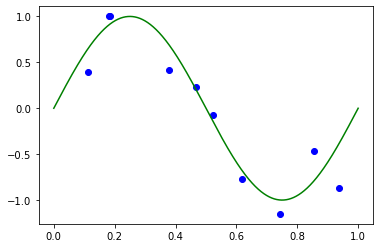

In [2]:
import numpy as np
import matplotlib.pyplot as plot

#true line
N = 10
xtrue=np.arange(0,1, 0.0000001)
ytrue= np.sin(2*np.pi*xtrue)
x = np.random.rand(N)
error = np.random.normal(0, 0.2, N)
y = np.sin(x*2*np.pi)+error
print(x, error, y)

plot.scatter(x, y, c = "blue")
plot.plot(xtrue, ytrue, c = "green")
plot.show()

In [17]:
#split training set and test set

xindex = np.random.rand(len(x)) < 0.8
print(xindex)
xtrain = x[xindex]
xtest = x[~xindex]
ytrain = y[xindex]
ytest = y[~xindex]
print(xtest)


[ True  True  True  True False  True  True  True  True  True]
[0.993839]


In [18]:
#generate polynomial terms
x0 = np.ones(len(xtrain))
x1 = np.array([x0, xtrain]).T
x2 = np.array([x0, xtrain, xtrain**2]).T
x3 = np.array([x0, xtrain, xtrain**2, xtrain**3]).T
x4 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4]).T
x5 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4, xtrain**5]).T
x6 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4, xtrain**5, xtrain**6]).T
x7 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4, xtrain**5, xtrain**6, xtrain**7]).T
x8 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4, xtrain**5, xtrain**6, xtrain**7, xtrain**8]).T
x9 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4, xtrain**5, xtrain**6, xtrain**7, xtrain**8, xtrain**9]).T

print(x0, ytrain)

[1. 1. 1. 1. 1. 1. 1. 1. 1.] [ 1.00324798 -0.21735417  0.60480335  0.8872634  -0.84718657  0.35608812
  0.25250452  0.8619325   0.65982703]


In [19]:
#fit regression models
from numpy.linalg import inv
def regressor(y, x):
    if len(x.shape) == 1:
        beta = 1/np.matmul(x.T, x)*np.matmul(x.T, y)
    else:
        beta = inv(np.matmul(x.T, x)).dot(x.T).dot(y)
    return beta

#model 0
beta0 = regressor(ytrain, x0)

#model 1
 #inv(np.matmul(x1.T, x1)).dot(x1.T).dot(ytrain)
beta1 = regressor(ytrain, x1)
#model 3
beta3 = regressor(ytrain, x3)
#model 9
beta9 = regressor(ytrain, x9)

[0.39568069 0.39568069 0.39568069 0.39568069 0.39568069 0.39568069
 0.39568069 0.39568069 0.39568069]


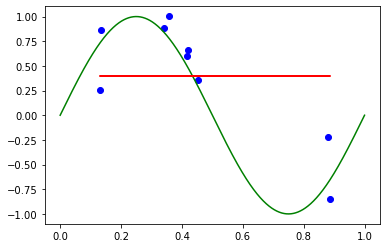

In [20]:
#plot the fitted line
plot.scatter(xtrain, ytrain, c= "blue")
plot.plot(xtrue, ytrue, c = "green")
yhat0 = x0*beta0
print(yhat0)
plot.plot(xtrain, yhat0, c = "red")
plot.show()

[ 0.54560513 -0.35073651  0.44580358  0.57673461 -0.35674015  0.38530258
  0.93971307  0.93387881  0.44156504]


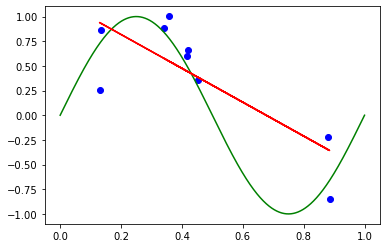

In [21]:
#plot the fitted line
plot.scatter(xtrain, ytrain, c= "blue")
plot.plot(xtrue, ytrue, c = "green")
yhat1 = np.matmul(x1,beta1.T)
print(yhat1)
plot.plot(xtrain, yhat1, c = "red")
plot.show()

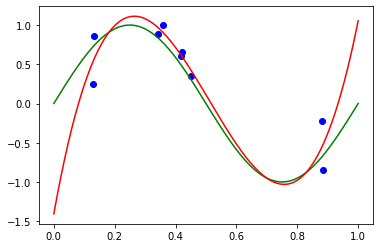

In [22]:
#plot the fitted line
plot.scatter(xtrain, ytrain, c= "blue")
plot.plot(xtrue, ytrue, c = "green")
x3true = np.array([np.ones(len(xtrue)), xtrue, xtrue**2, xtrue**3]).T
yhat3 = np.matmul(x3true,beta3.T)
#print(yhat3)
order = np.argsort(xtrue)
plot.plot(xtrue[order], yhat3[order], c = "red")
plot.show()

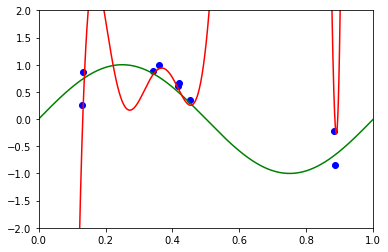

In [23]:
#plot the fitted line
plot.scatter(xtrain, ytrain, c= "blue")
plot.plot(xtrue, ytrue, c = "green")
x3true = np.array([np.ones(len(xtrue)), xtrue, xtrue**2, xtrue**3]).T
x9true = np.array([np.ones(len(xtrue)), xtrue, xtrue**2, xtrue**3, xtrue**4, xtrue**5, xtrue**6, xtrue**7, xtrue**8, xtrue**9]).T

yhat9 = np.matmul(x9true,beta9.T)
#print(yhat3)
order = np.argsort(xtrue)
plot.plot(xtrue[order], yhat9[order], c = "red")
plot.xlim(0,1)
plot.ylim(-2, 2)
plot.show()

#### The in-sample evaluation results and out-of-sample results indicate the reason why we need to divide data into training set and test set.

In [24]:
#calculate RMSE
#in-sample evaluation
yhat0 = x0*beta0
yhat1 = np.matmul(x1, beta1.T)
yhat3 = np.matmul(x3, beta3.T)
yhat9 = np.matmul(x9, beta9.T)

RMSE0 = (np.sum((ytrain - yhat0)**2)/len(ytrain))**0.5
print(RMSE0)
RMSE1 = (np.sum((ytrain - yhat1)**2)/len(ytrain))**0.5
print(RMSE1)
RMSE3 = (np.sum((ytrain - yhat3)**2)/len(ytrain))**0.5
print(RMSE3)
RMSE9 = (np.sum((ytrain - yhat9)**2)/len(ytrain))**0.5
print(RMSE9)
print(ytrain, yhat9)

0.5661061612368693
0.3520413831756825
0.2129619180952824
0.5297397851706873
[ 1.00324798 -0.21735417  0.60480335  0.8872634  -0.84718657  0.35608812
  0.25250452  0.8619325   0.65982703] [ 0.92438699  0.60224277  0.5621424   0.80965608  0.00755604  0.25441829
 -0.4953538   0.13858168  0.53189369]


In [26]:
#out-of-sample ecaluation
yhtest0 = x0*beta0
x1test = np.array([[1], xtest]).T
yhtest1 = np.matmul(x1test, beta1.T)
x3test = np.array([[1], xtest, xtest**2, xtest**3]).T
yhtest3 = np.matmul(x3test, beta3.T)
x9test = np.array([[1], xtest, xtest**2, xtest**3, xtest**4, xtest**5, xtest**6, xtest**7, xtest**8, xtest**9]).T
yhtest9 = np.matmul(x9test, beta9.T)

RMSE0 = (np.sum((ytest - yhtest0)**2)/len(ytest))**0.5
print(RMSE0)
RMSE1 = (np.sum((ytest - yhtest1)**2)/len(ytest))**0.5
print(RMSE1)
RMSE3 = (np.sum((ytest - yhtest3)**2)/len(ytest))**0.5
print(RMSE3)
RMSE9 = (np.sum((ytest - yhtest9)**2)/len(ytest))**0.5
print(RMSE9)

0.7431875198077776
0.6915615678370147
0.7878446017012507
449.2389195421118


#### It is also known as over-fitting

#### when the sample size increases (sample size $N$ is bigger than the number of polinomial order terms $M$)

(8032,)
[ 3.20620238e-02  5.29252265e+00  1.51743140e+01 -1.66452922e+02
  5.77570886e+02 -1.48832050e+03  2.58048454e+03 -2.61549199e+03
  1.39862341e+03 -3.06914500e+02]


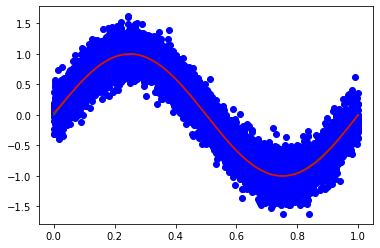

0.19968128143068176
0.2000617158409


In [27]:
N = 10000
xtrue=np.arange(0,1, 0.0001)
ytrue= np.sin(2*np.pi*xtrue)
x = np.random.rand(N)
error = np.random.normal(0, 0.2, N)
y = np.sin(x*2*np.pi)+error

#split training set and test set
xindex = np.random.rand(len(x)) < 0.8
xtrain = x[xindex]
xtest = x[~xindex]
ytrain = y[xindex]
ytest = y[~xindex]

x0 = np.ones(len(xtrain))
# polinomial term with 9 orders
x9 = np.array([x0, xtrain, xtrain**2, xtrain**3, xtrain**4, xtrain**5, xtrain**6, xtrain**7, xtrain**8, xtrain**9]).T
print(xtrain.shape)
beta9 = regressor(ytrain, x9)
print(beta9)
#plot the fitted line
plot.scatter(xtrain, ytrain, c= "blue")
plot.plot(xtrue, ytrue, c = "green")
x9true = np.array([np.ones(len(xtrue)), xtrue, xtrue**2, xtrue**3, xtrue**4, xtrue**5, xtrue**6, xtrue**7, xtrue**8, xtrue**9]).T

yhat9 = np.matmul(x9true,beta9.T)
#print(yhat3)
order = np.argsort(xtrue)
plot.plot(xtrue[order], yhat9[order], c = "red")
plot.show()

yhat9 = np.matmul(x9, beta9.T)
RMSE9 = (np.sum((ytrain - yhat9)**2)/len(ytrain))**0.5
print(RMSE9)

x9test = np.array([np.ones(len(xtest)), xtest, xtest**2, xtest**3, xtest**4, xtest**5, xtest**6, xtest**7, xtest**8, xtest**9]).T
yhtest9 = np.matmul(x9test, beta9.T)
RMSE9 = (np.sum((ytest - yhtest9)**2)/len(ytest))**0.5
print(RMSE9)

### Regularization
One technique to control the over-fitting phenomenon is add some penalty terms in the error function. The simplest one is the form of a sum of squares of all the coefficients. 
$$\tilde{E}(w) = \frac{1}{2}\sum_{n=1}^N\{y(x_n, \boldsymbol{w}) - t_n \}^2 + \frac{\lambda}{2}||\boldsymbol{w}||^2$$
where $||\boldsymbol{w}||^2$ is defined as $\boldsymbol{w}^T\boldsymbol{w} = w_0^2 + w_1^2 +\dots + w_M^2$

In [29]:
def regular_regressor(y, x, lam):
    p = len(x[0])
    if len(x.shape) == 1:
        beta = 1/(np.matmul(x.T, x) + lam)*np.matmul(x.T, y)
    else:
        beta = inv(np.matmul(x.T, x) + lam*np.identity(p)).dot(x.T).dot(y)
    return beta

beta9reg = regular_regressor(ytrain, x9, 3)
print(beta9, beta9reg)

yhat9reg = np.matmul(x9, beta9reg.T)
RMSE9reg = (np.sum((ytrain - yhat9reg)**2)/len(ytrain))**0.5
print(RMSE9, RMSE9reg)

x9test = np.array([np.ones(len(xtest)), xtest, xtest**2, xtest**3, xtest**4, xtest**5, xtest**6, xtest**7, xtest**8, xtest**9]).T
yhtest9reg = np.matmul(x9test, beta9reg.T)
RMSE9reg = (np.sum((ytest - yhtest9reg)**2)/len(ytest))**0.5
print(RMSE9, RMSE9reg)

[ 3.20620238e-02  5.29252265e+00  1.51743140e+01 -1.66452922e+02
  5.77570886e+02 -1.48832050e+03  2.58048454e+03 -2.61549199e+03
  1.39862341e+03 -3.06914500e+02] [ 0.51391395  2.34511303 -5.26726582 -3.0270823  -0.05465641  1.63160841
  2.07576698  1.68112991  0.80250236 -0.31434411]
0.2000617158409 0.2789684405138303
0.2000617158409 0.27915253451475164


### 1.2 Probability Theory 
<ul>
    <li> Sum rule: $p(X = x_i) = \sum_{j = 1}^Lp(X = x_i, Y = y_j)$</li>
    <li> Product rule: $p(X = x_i, Y = y_j) = p(Y = y_j | X = x_i) p(X = x_i)$</li>
    <li>Bayes' theorem: $p(X = x_i | Y = y_j) = \frac{p(Y = y_j | X = x_i) p(X = x_i) }{p(Y = y_j)} $</li>
    <li>$p(X = x_i | Y = y_j) \propto p(Y = y_j | X = x_i) p(X = x_i) $ in which $p(X = x_i) $ is named as prior distribution, $p(X = x_i | Y = y_j) $ is named as posterior distribution</li>
    <li>sequential conditions: $$
    \begin{align}
    & p(X=x_i | Y_t=y_j, Y_{t-1}=y_k)\\
    & \propto p(Y_t = y_j, Y_{t-1}=y_k | X = x_i) p(X = x_i)\\ 
    & =p(Y_t = y_j|X= x_i, Y_{t-1}=y_k) p(Y_{t-1}=y_k| X = x_i) p(X = x_i)\\
    & \propto p(Y_t = y_j| X = x_i, Y_{t-1}=y_k) p(X = x_i | Y_{t-1}=y_k)\\
    \end{align}
    $$ if $Y_t$ is independent from $Y_{t-1}$, then 
    $$
    \begin{align}
    & p(X=x_i | Y_t=y_j, Y_{t-1}=y_k)\\
    & \propto p(Y_t = y_j| X = x_i) p(X = x_i | Y_{t-1}=y_k)\\
    \end{align}
    $$</li>
 </ul>
 
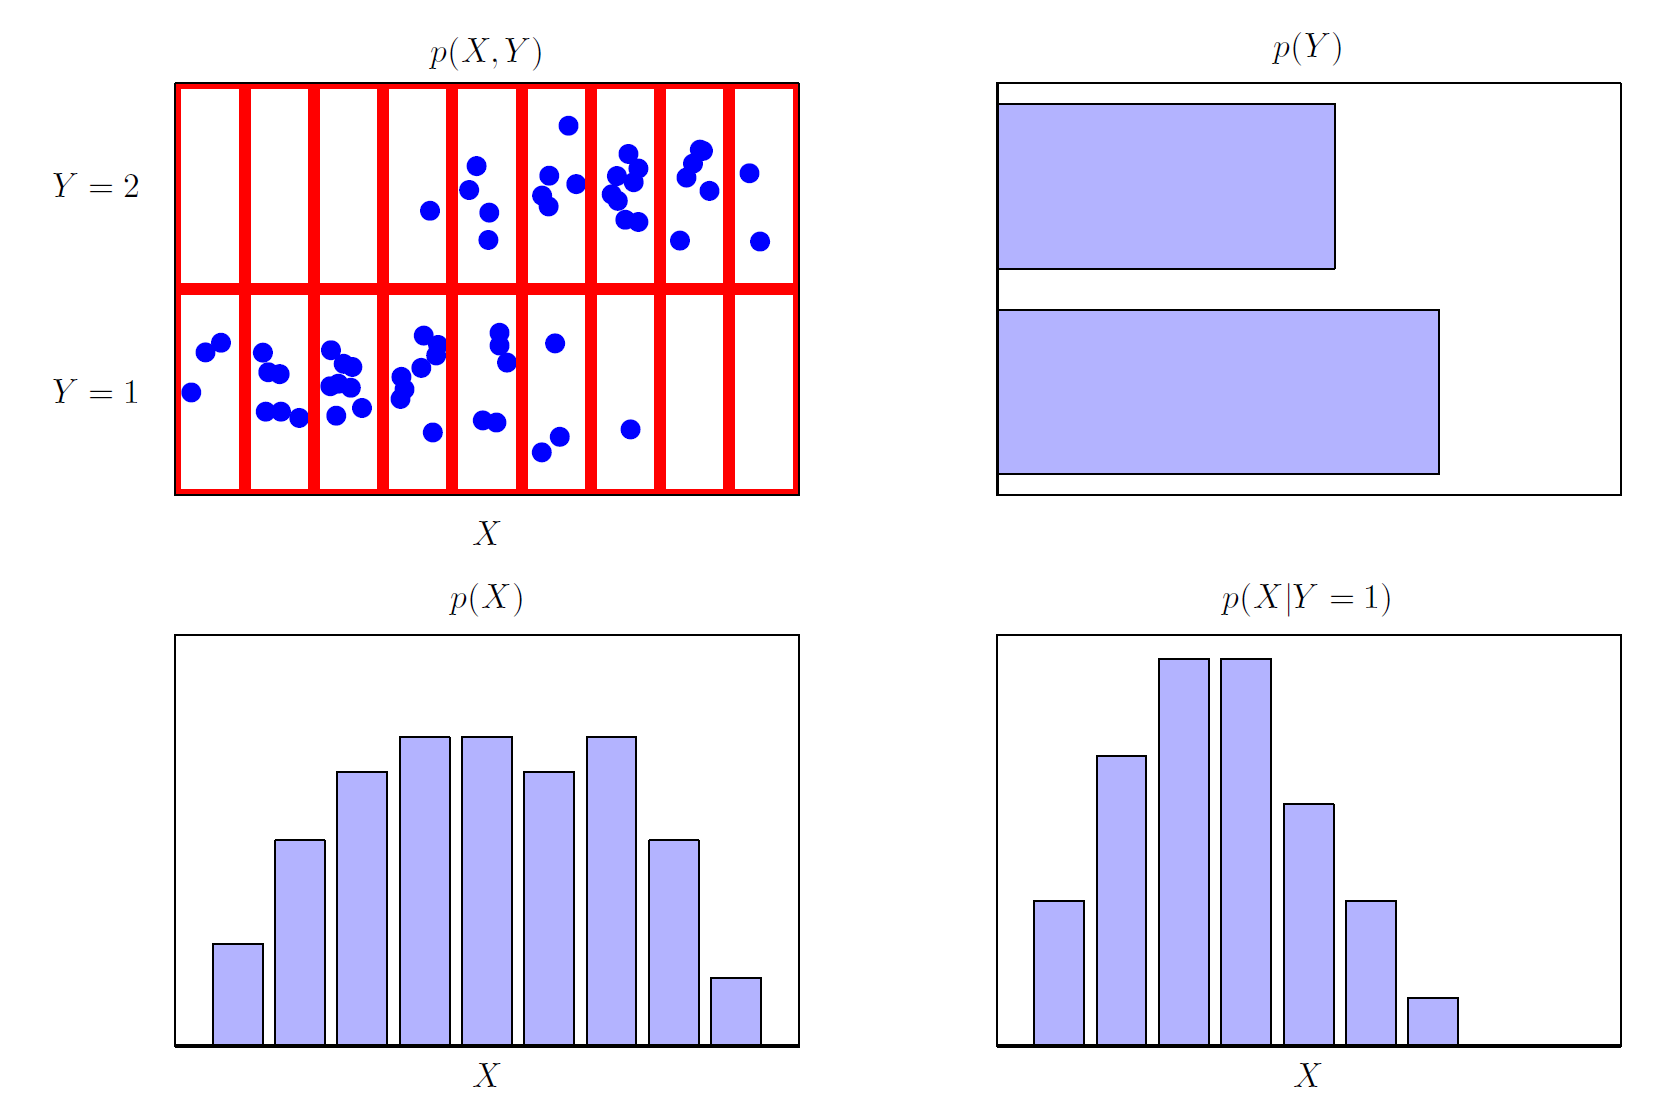

#### 1.2.1 Probability density
Probability density function is used to calculate the probability for continuous random variables.
$$p(x\in (a,b)) = \int_a^b p(x) dx$$
pdf must satisfy two conditions:
$$p(x) \geq 0$$
$$\int_{-\infty}^\infty p(x)dx = 1$$

probability transformation
$$p_y(y) = p_x(x)|\frac{dx}{dy}| = p_x(g(y))|g'(y)|$$ where $x = g(y)$

Cumulative probability function
$$P(z) \equiv p(x \in (-\infty, z)) = \int_{-\infty}^z p(x)dx$$

Similarly, sum rule and product rule
$$p(x) = \int p(x,y)dy$$
$$p(x,y) = p(y|x) p(x)$$

#### 1.2.2 Expectations and covariances
The expectation of some function $f(x)$ of the random variable $x$ is
$\mathbb{E}[f] = \sum_x f(x) p(x) $ for discrete random variable
or $\mathbb{E}[f] = \int f(x) p(x) dx$ for continuous variable

for random sample $x_n$ from a population with sample size $N$ the estimation is
$\mathbb{E}[f] \approx \frac{1}{N} \sum_{n=1}^N f(x_n)$

$\mathbb{E}_x[f(x,y)] = \int_x f(x,y) p(x) dx$ is a function of $y$ (similarly, for the discrete case)

Conditional expectation: $\mathbb{E}_x[f|y] = \sum_x f(x) p(x|y)$ (similarly, for the continuous case)

Variance of $f(x)$: $var[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$
covariance: $cov(x,y) = \mathbb{E}_{x,y}[xy] - \mathbb{E}[x]\mathbb{E}[y]$

#### 1.2.3 Bayesian probabilities
The main difference is about parameters (or statistics). For frequentist interpretation, parameters have true values, but for Bayesian statistics, they would like to quantify the uncertainty that surrounds the appropriate choice for the model parameters.
Denote mode parameters $\boldsymbol{w}$ and the observed data $D = \{ t_1, \dots, t_N\}$ (so far, we do not consider the input $x$).
$$p(\boldsymbol{w} | D) \propto p(D | \boldsymbol{w}) p(\boldsymbol{w})$$
$$posterior \propto likelihood \times prior$$

prior: informative prior, noninformative prior

##### We still need to consider (assume) the structure of the model
#### 1.2.4 The Gaussian (normal) distribution
$$N(x|\mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}}exp\{-\frac{1}{2\sigma^2}(x - \mu)^2\}$$
Parameters: mean $\mu$; variance $\sigma^2$

Precision: $\beta = 1/\sigma^2$

If $X$ follows a normal distribution, $\mathbb{E}[x] =\int_{-\infty}^{\infty} N(x | \mu, \sigma^2)x dx = \mu$, $\mathbb{E}[x^2] =\int_{-\infty}^{\infty} N(x | \mu, \sigma^2)x^2 dx = \mu^2 + \sigma^2$

Multivariate normal pdf: 
$$
\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma})=\frac{1}{(2 \pi)^{D / 2}} \frac{1}{|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right\}
$$

i.i.d.: independent and identically distributed. independent: $f_{X_i, X_j}(x_i, x_j) = f_{X_i}(x_i)f_{X_j}(x_j)$; identically distributed: $f(a) = f_{X_i}(a) = f_{X_j}(a) \text{ , for any } i \neq j \text{ and any }a$

normal likelihood (could be understood as a joint distribution with all observed random samples, but it is the function of parameters instead of random samples): 
$$
p\left(\mathbf{x} \mid \mu, \sigma^2\right)=\prod_{n=1}^N \mathcal{N}\left(x_n \mid \mu, \sigma^2\right)
$$

log-likelihood and MLE (maximum likelihood estimation):
$$
\ln p\left(\mathbf{x} \mid \mu, \sigma^2\right)=-\frac{1}{2 \sigma^2} \sum_{n=1}^N\left(x_n-\mu\right)^2-\frac{N}{2} \ln \sigma^2-\frac{N}{2} \ln (2 \pi)
$$
The reason why we should maximize the likelihood function is that we want to find the parameters to make the distribution mostly fit the data, in other words, we want the lighest joint probability density to indicate that the samples we have observed has the highest probability to be observed. This statement may not be true if the sample is not representative enough (sample size is small or the sample is not i.i.d. or biased).

unbiased estimation: 
$$
\widetilde{\sigma}^2=\frac{N}{N-1} \sigma_{\mathrm{ML}}^2=\frac{1}{N-1} \sum_{n=1}^N\left(x_n-\mu_{\mathrm{ML}}\right)^2
$$

#### 1.2.5 curve fitting re-visited
##### The goal in the curve fitting problem is to be able to make predictions for the target variahble $t$ given some new value of the input variable $x$ on the basis of a set of training data comprising $N$ input values $\boldsymbol{x} = (x_1, \dots, x_N)^T$ and their corresponding target values $\boldsymbol{t} = (t_1, \dots, t_N)^T$. 

The uncertainty over the value of the target values could be expressed through a probability distribution.

##### Assume the target variable $t$ given $x$ follows a normal distribution.
$$p(t | x, \boldsymbol{w}, \beta) = N(t | y(x, \boldsymbol{w}), \beta^{-1})$$
Using precision is convenient in some deduction and calculation.

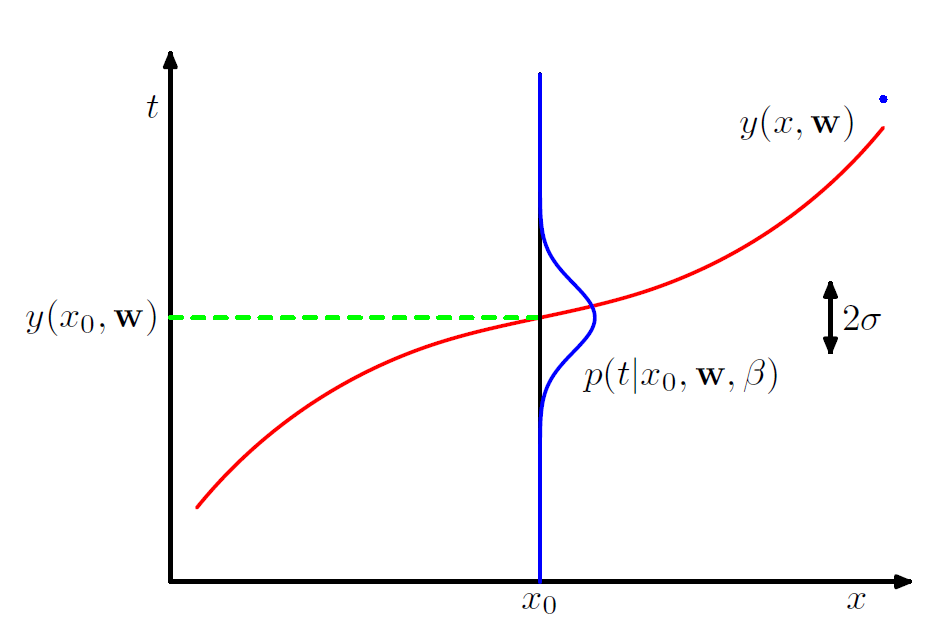


After getting the training data and test data $\{\boldsymbol{x}, \boldsymbol{t}\}$, we can write down the corresponding likelihood function 
$$p(\boldsymbol{t} | \boldsymbol{x}, w, \beta) = \prod_{n=1}^N N(t_n| y(x_n, w), \beta^{-1})$$
and the log-likelihood function
$$
\ln p(\mathbf{t} \mid \mathbf{x}, \mathbf{w}, \beta)=-\frac{\beta}{2} \sum_{n=1}^N\left\{y\left(x_n, \mathbf{w}\right)-t_n\right\}^2+\frac{N}{2} \ln \beta-\frac{N}{2} \ln (2 \pi)
$$

and solve it with the first derivative equals to 0.

After estimating the maximum likleihood parameters $w_{ML}$ and $\beta_{ML}$
the prediction could be done with predictive distribution and the new obsedved $x$
$p(t | x, w_{ML}, \beta_{ML}) = N(t | y(x, w_{ML}), \beta_{ML}^{-1})$

#### 1.2.6 Bayesian approach and curve fitting

Give a prior distribution for $w$ with appropriate assumption: 
$$p(w | \alpha) = N(w | 0, \alpha^{-1}\mathbf{I}) $$

Then the posterior distribution of $w$ is also a normal distribution, once the likelihood function of $t$ given $x$ is nromal and the relationship is linear combination $y(x, w) = X w$

$$p(w | \boldsymbol{t}, \boldsymbol{x}, \alpha, \beta) \propto p(\boldsymbol{t} | \boldsymbol{x}, w, \beta) p(w | \alpha)$$

MAP: maximum posterior. For this example, the MAP result is equivalent to minimize the panelized error funcion
$$
\frac{\beta}{2} \sum_{n=1}^N\left\{y\left(x_n, \mathbf{w}\right)-t_n\right\}^2+\frac{\alpha}{2} \mathbf{w}^{\mathrm{T}} \mathbf{w} .
$$
 with regularization parameter $\lambda = \alpha/ \beta$
 
 ##### for predictive distribution
 For this circumstance, the precision $\beta$ is estimated through maximum likelihood estimation, while the complete Bayesian method we need to consider the posterior distribution of $\beta$ and integrate it out in predictive distribution, just like what we will do for the parameters $w$.
 So far, we use the MLE for $\beta$, $\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^N\{y(x_n, \boldsymbol{w}_{ML}) - t_n \}^2$
 
Then we can only focus on the parameter $w$, and find the predictive distribution by integrate $w$ out. (the following $\beta$ is applied with $\beta_{ML}$)
$$
p(t \mid x, \mathbf{x}, \mathbf{t})=\int p(t \mid x, \mathbf{w}) p(\mathbf{w} \mid \mathbf{x}, \mathbf{t}) \mathrm{d} \mathbf{w} = N(t | m(x), s^2(x)), 
$$
in which $m(x) = \beta \phi(x)^T S \sum_{n=1}^N \phi(x_n)t_n$, 

$s^2(x) = \beta^{-1} + \phi(x)^TS\phi(x)$, 

$S^{-1} = \alpha \mathbf{I} + \beta\sum_{n=1}^N \phi(x_n)\phi(x_n)^T$

here the function vector $\phi(x)$ with elements $\phi_i(x) = x^i$

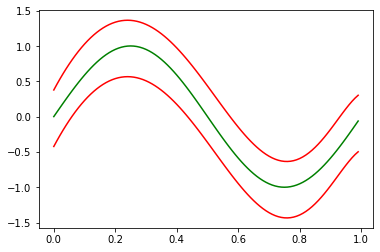

In [55]:
#Construct the predictive distribution
def posterior_parameters(y, x, x_new, alpha):
    p = len(x[0])
    n = len(y)
    xx = np.matmul(x.T, x)
    beta = 1/(1/n*sum((y - np.matmul(x, inv(xx)).dot(x.T).dot(y))**2))
    S_inv = alpha*np.identity(p) +beta*np.matmul(x.T, x)
    S = inv(S_inv)
    s2 = 1/beta + np.matmul(x_new.T, S).dot(x_new)
    m = beta*np.matmul(x_new.T, S).dot(x.T).dot(y)
    return m, s2

xtrue=np.arange(0,1, 0.01)
ytrue= np.sin(2*np.pi*xtrue)
x9true = np.array([np.ones(len(xtrue)), xtrue, xtrue**2, xtrue**3, xtrue**4, xtrue**5, xtrue**6, xtrue**7, xtrue**8, xtrue**9]).T

upline = np.zeros(len(xtrue))
downline = np.zeros(len(xtrue))
for i in range(len(xtrue)):
    m,s2 = posterior_parameters(ytrain, x9, x9true[i,:], alpha = 1)
    upline[i] = m+2*s2**0.5
    downline[i] = m - 2*s2**0.5
    
plot.plot(xtrue, upline, c = "red")
plot.plot(xtrue, downline, c = "red")
plot.plot(xtrue, ytrue, c = "green")
plot.show()


### 1.3 Model Selection

#### select distribution structure
normal distribution is used in many circumstance when the targer variable is continuous. But when target variable is binary or multinomial, binomial distribution + beta distribution, and multinomial distribution + Direchlet distribution would be considered. 

Even when target variable is continuous, for only positive region, gamma distribution may be discussed.

link function, or active funciton, some times used to transform other conditional distributions of target variable to normal or looking like normal.

#### select variables (1. over-fitting, 2. curse of dimensionality)

over-fitting:when we generate $x, x^2, \dots, x^M$ from one input $x$, although the model for parameter $w$ is still linear, for $x$, the model is polynomial. (this could be treated as a link function or active function which makes the mapping model more complex with consistent information input.)

curse of dimentionality: check Section 1.4

#### selection standard

out-of-sample Root Mean Squared Error (RMSE)

information criteria: 

Akaike information criterion (AIC) choose the model with largest $lnp(D | w_{ML}) - M$ (or choose the model with the smallest $-2ln p(D|w_{ML}) + 2M$), in which $lnp(D | w_{ML})$ is the log likelihood function with MLE parameters. 

Bayesian information criterion (BIC) in Section 4.4.1

#### cross-validation
<ul>
    <li>Divide the whole data into $S$ folders based on sampling individuals (row division) </li>
    <li>Choose one folder to be the validation set (test set) and all the rest to be the training set </li>
    <li>Training process: use training set to estimate the model parameters </li>
    <li>Validation process: use test set input to do the prediction with the model parameters estemated from the training process, then apply appropriate evaluation standard (e.g.) RMSE to evaluate the ability of model generalization </li>
    <li>Repeat the training process and validation process choosing different folders to be the validation set iteratively </li>
</ul>

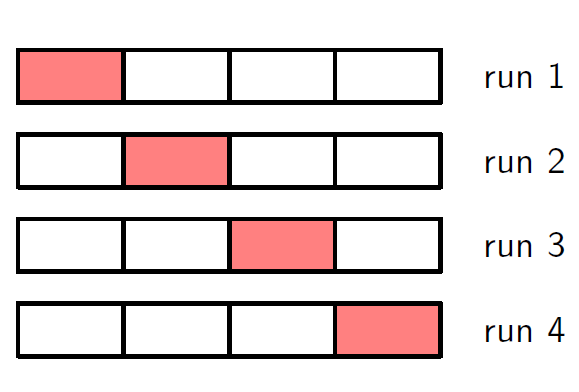

### 1.4 The Curse of Dimensionality

In previous example, one-dimension input (only one variable) $x$ is considered. For practice, multidimensional input is more common. Every sampled individual (observation) would be considered as a point in high dimensional space. 

Example in Appendix A: the target variable is a multinomial variable with three categories colored with blue, green, and red. $x_6$ and $x_7$ are two of the input variables.

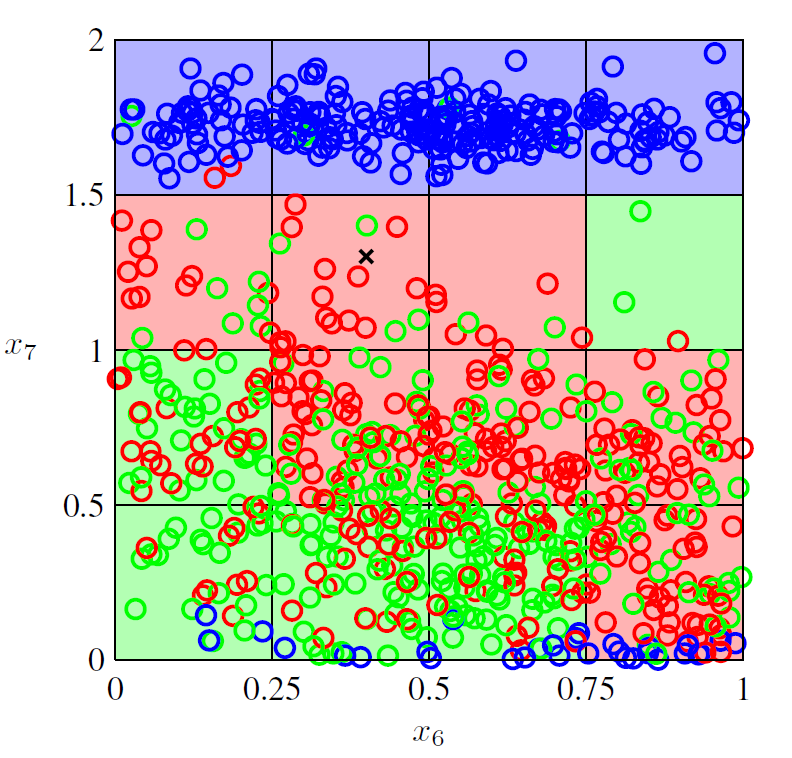

The naive algorithm for the classification is to divide the spece constructed with $x_6$ and $x_7$ into 16 blocks, in which the category with highest proportion decide the category of the block. 

Now consider when adding more variables, what would happen?


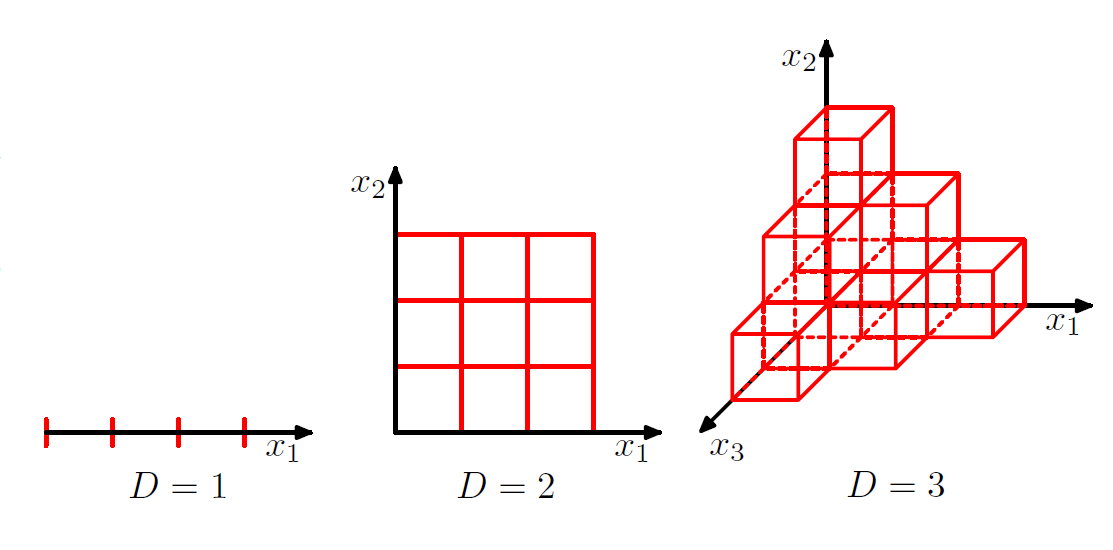

Also, because the sample size is finite, when the number of blocks increase exponentially, the number of observations in each block would be little.

The most severe problem: if we divide a region of a space into regular cells, then the number of such cells grows exponentially with the dimensionality of the space. With an exponentially large number of cells, we would need an exponentially large quantity of training data in order to ensure that the cells are not empty.

Considering the polynomial curve fitting example, if we have $D$ input variables, then a general polynomial with coefficients up to order 3 would take the form

$$
y(\mathbf{x}, \mathbf{w})=w_0+\sum_{i=1}^D w_i x_i+\sum_{i=1}^D \sum_{j=1}^D w_{i j} x_i x_j+\sum_{i=1}^D \sum_{j=1}^D \sum_{k=1}^D w_{i j k} x_i x_j x_k
$$

Consider standard normal distribution, if we select the range $(-\infty, -1.96)$ and $(1.96, \infty)$, the proportion of observations should counted as $5\%$ of all observations. When the dimension increases into two dimension, if we choose the same range to exclude points from the circle, the proportion will become $(1 - 0.05)^2$. As dimension increases, more points would be out of bounds.



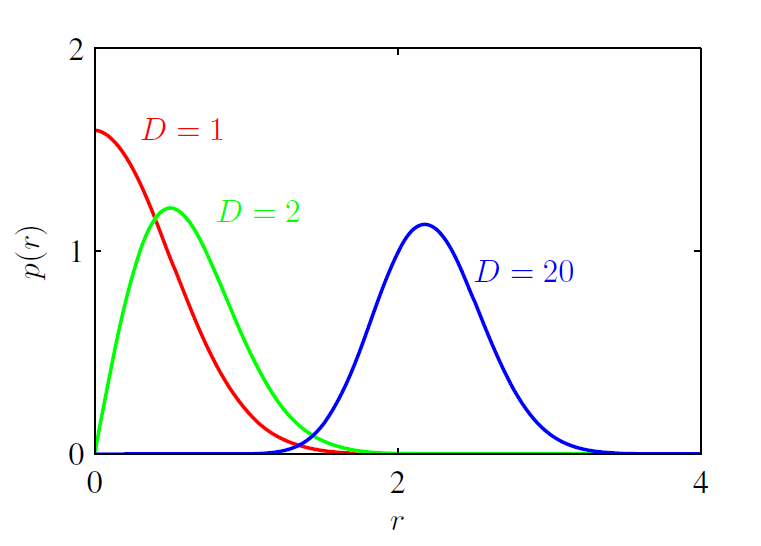

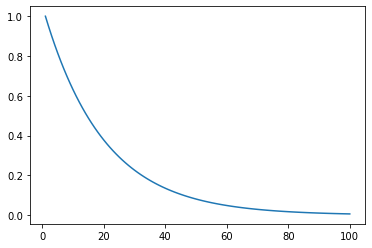

In [4]:
order = 100
sequence = np.arange(1,101, 1)
proportion = np.zeros(order)
for i in range(order):
    proportion[i] = (1-0.05)**i
    
plot.plot(sequence, proportion)
plot.show()

(array([ 1.,  0.,  2.,  3.,  4., 14.,  9.,  8.,  7.,  7.,  1.,  2.,  4.,
         5.,  7.,  8.,  7.,  4.,  3.,  4.]),
 array([-3.36423758, -3.0567007 , -2.74916383, -2.44162696, -2.13409008,
        -1.82655321, -1.51901634, -1.21147947, -0.90394259, -0.59640572,
        -0.28886885,  0.01866803,  0.3262049 ,  0.63374177,  0.94127864,
         1.24881552,  1.55635239,  1.86388926,  2.17142614,  2.47896301,
         2.78649988]),
 <BarContainer object of 20 artists>)

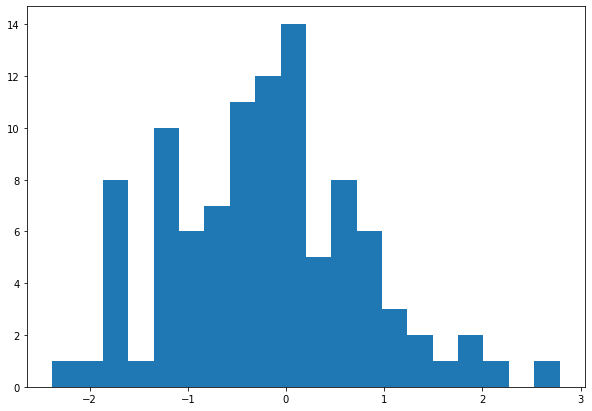

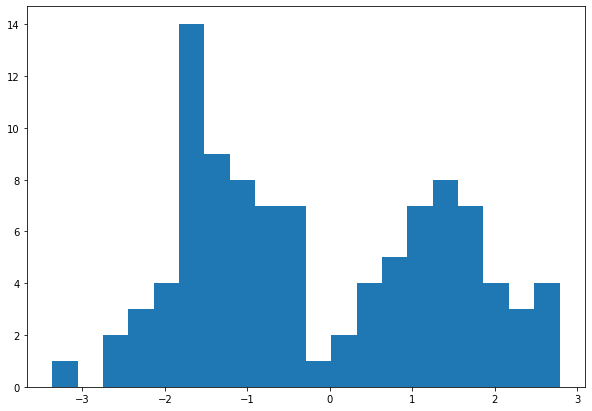

In [8]:
import numpy as np
import matplotlib.pyplot as plot

order = 3
n = 100
datamat = np.zeros(order*n)
datamat.shape = (n, order)

for i in range(order):
    datamat[:,i] = np.random.normal(0,1,n)
    
outindex = np.zeros(n)
threshold = 1.96
thresholdvec = np.ones(order)*threshold
#print(thresholdvec)

fig, axs = plot.subplots(
                        figsize =(10, 7))

if order > 1:
    axs.hist(datamat[:,1], bins = 20)
else:
    axs.hist(datamat, bins = 20)


onedim = np.amax(datamat, axis = 1)

onedim2 = np.amin(datamat, axis = 1)

onedimall = np.zeros(n)
for i in range(n):
    if onedim[i] > np.abs(onedim2[i]):
        onedimall[i] = onedim[i]
    else:
        onedimall[i] = onedim2[i]

fig, axs = plot.subplots(
                        figsize =(10, 7))
 
axs.hist(onedimall, bins = 20)

### 1.5 Decision Theory

The probability models to fit binary or mutinomial target variable are conditional binomial model and conditional multinomial model. But the loss functions which will be introduced below are more intuitive from bayesian point of view, and different from the likelihood function of bimonial or multinomial distribution.

#### Mainly for classification
The target variable $t$ is categorical. Usually, for two-category circumstance, $t = 0$ corresponds to class $\mathcal{C}_1$ and $t = 1$ corresponds to class $\mathcal{C}_2$. 

It is a supervised learning. The training data we can get is $x, \mathcal{C}_k$. And the corresponding known distribution is the joint distribution $p(x, \mathcal{C}_k)$.

The pattern recognition process then could be constructed through the conditional proability model $p(\mathcal{C}_k | x)$. Then with Bayes' theorem 
$$p(\mathcal{C}_k | x) = \frac{p(x|\mathcal{C}_k)p(\mathcal{C}_k)}{p(x)}$$

The example is using X-ray pictures (denotes as $x$) to identify whether the patient has cancer or not (target $\mathcal{C}_k$). 

#### 1.5.1 minimizing the misclassificaiton rate

The basic idea is similar to the picture in section 1.4. 
<ul>
<li>We use $\mathbf{X}$ to construct a high dimensional space</li>
    <li>then we divide the space into different regions, </li> 
    <li> for each region, the goal is to put observation points with the same classification into the same region. </li>
     <li>the region is named as decision region, $\mathcal{R}_k$ </li>
    <li>the boundaries between decision regions are called decision boundaris or decision surfaces </li>
    <li> The probability of mistake is the proportion that the observations are assigned to the wrong dicision region</li>
    </ul>
    $$
\begin{aligned}
p(\text { mistake }) & =p\left(\mathbf{x} \in \mathcal{R}_1, \mathcal{C}_2\right)+p\left(\mathbf{x} \in \mathcal{R}_2, \mathcal{C}_1\right) \\
& =\int_{\mathcal{R}_1} p\left(\mathbf{x}, \mathcal{C}_2\right) \mathrm{d} \mathbf{x}+\int_{\mathcal{R}_2} p\left(\mathbf{x}, \mathcal{C}_1\right) \mathrm{d} \mathbf{x}
\end{aligned}
$$

<ul>
    <li>To minimize the mistake probability, we need to assign the observations into class $\mathcal{C}_1$ once $p(\mathcal{C}_1,x) >  p(\mathcal{C}_2, x)$, and it is equivalent to $p(\mathcal{C}_1|x) >  p(\mathcal{C}_2|x)$ (for one observation $x_n$, if $p(\mathcal{C}_1,x_n)$ is bigger, then we assign it to $\mathcal{R}_1$, then the integration including this observation is $\int_{\mathcal{R}_1} p\left(\mathbf{x}, \mathcal{C}_2\right) \mathrm{d} \mathbf{x}$, which is the smaller one)</li>
    <li> The equivalent idea is that we want $p(\mathcal{C}_k | x)$ is the largest one once $x \in \mathcal{R}_k$. So that overall, we need to maximize the probability of being correct.</li>
    </ul>
    $$
\begin{aligned}
p(\text { correct }) & =\sum_{k=1}^K p\left(\mathbf{x} \in \mathcal{R}_k, \mathcal{C}_k\right) \\
& =\sum_{k=1}^K \int_{\mathcal{R}_k} p\left(\mathbf{x}, \mathcal{C}_k\right) \mathrm{d} \mathbf{x}
\end{aligned}
$$

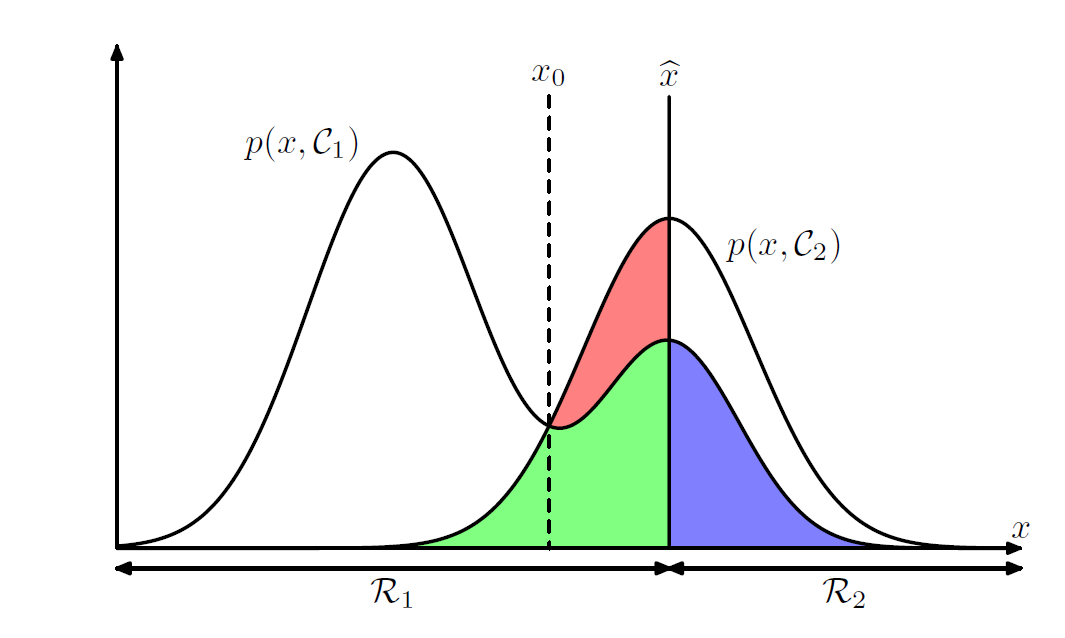

#### 1.5.2 minimizing the expected loss

The mistakes in all categories may not be the same important according to two facts:
<ul>
    <li>The actual severity of the mistake in this category (predicting normal person to cancer patients vs. predicting cancer patients to normal person)</li>
    <li>The imbalance of the categories of the target variable in the samlpe: in a sample with 1000 normal persons and 1 patients </li>
</ul>
<ul>
    <li>The loss function (cost function): minimize </li>
    <li>The utility function (negative of the loss): maximize </li>
    
</ul>

Since it is the discrete case, the loss could be assigned 
$$L =
\begin{array}{ccc}
 & \text { cancer } & \text { normal } \\
\text { cancer } & 0 & 1000 \\
\text { normal } & 1 & 0
\end{array}
$$

Then the expected loss would be
$$\mathbb{E}[L] = \sum_k\sum_j\int_{\mathcal{R}_j}L_{kj} p(x, \mathcal{C}_k)dx$$
With the product rule, $p(x, \mathcal{C}_k) = p(\mathcal{C}_k | x) p(x)$, the common factor $p(x)$ could be eliminated. For each x, we need to minimize 
$$\sum_k L_{kj} p(\mathcal{C}_k | x)$$

#### 1.5.3 the reject option
We can choose the threshold $\theta$ for all classes with $p(\mathcal{C}_k | x)$. For this circumstance, even for the binary variable, we construct two models $p(\mathcal{C}_1 | x)$ and $p(\mathcal{C}_2 | x)$, then for some observations, we can reject to make the decision.

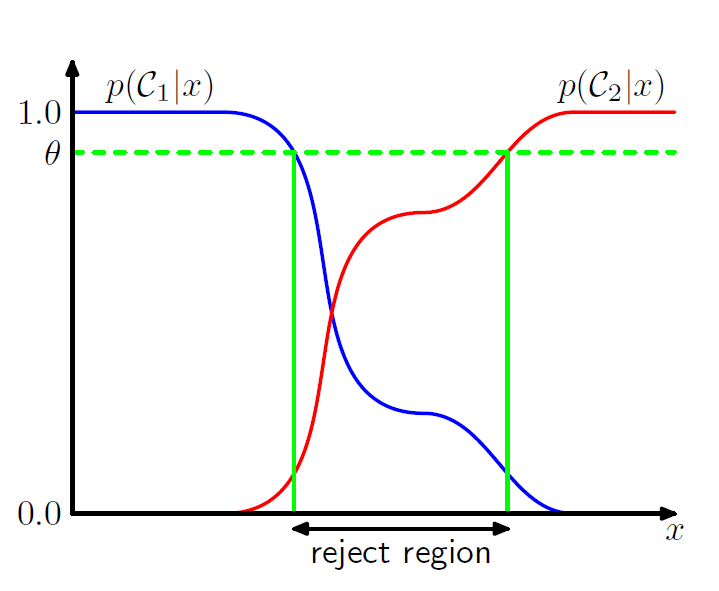

#### 1.5.4 inference and decision

<ul>
    <li> Inference: using training data to estimate model parameters (specifically, the posterior distribution of the parameters)</li>
    <li> decision: use the posterior probabilities to make optimal class assigments</li>
    </ul>
    
Alternative possibility: discriminant function: solve both problems together. Simply learn a function that maps inputs $x$ directly into decisions (SVM is a typical one of them) (This one is the one without probability)

#### Three distinct approaches to solve decision problems:
<ul>
    <li> a) generative models: Use Bayes' theorem $p\left(\mathcal{C}_k \mid \mathbf{x}\right)=\frac{p\left(\mathbf{x} \mid \mathcal{C}_k\right) p\left(\mathcal{C}_k\right)}{p(\mathbf{x})}$, in which $p(\mathbf{x})=\sum_k p\left(\mathbf{x} \mid \mathcal{C}_k\right) p\left(\mathcal{C}_k\right)$. Because we can find the $p(x)$, which means we can generate new inputs from $p(x)$ </li>
</ul>
    


<ul>
<li> b) discriminative models: directly find $p(\mathcal{C}_k | x)$ through corresponding loss function </li>
    
<li> c) discriminant function: find a function $f(x)$ that $f = 0$ or $-1$ represents $\mathcal{C}_1$ and $f = 1$ represents $\mathcal{C}_2$ </li>
</ul>

<ul>
    <li> The approach a) is very complicated (wasteful of computational resources if we only want to make classification), but it allows the marginal density of data $p(x)$ to be determined. This can be used for detecting new data points with low probability under the model and for which the predictions may be of low accuracy. (If we feel some data points are very different from the rest, we can generate more observations to learn the features of the different ones.) </li>
    <li> Approach b): There are lots of different want to construct the conditional distribution of $p(\mathcal{C}|x)$ and estimate the parameters. One interesting thing is to explore the relative merits of the generative model and the discriminative model to machine learning and in finding ways to combine them. </li>
    <li> Approach c): directly finding the discriminant function mapping $x$ to the label. Simple and direct, but no longer have access to the posterior probabilities.</li>
    </ul>
    
The next question is why knowing posterior probabilities is important?
<ul>
    <li>minimizing risk: knowing posterior probability could help us easily modify the loss function $\sum_k L_{kj} p(\mathcal{C}_k | x)$ if we want to change the level of risk, $L$. </li>
    <li>rejection option: posterior probabiity could help us quantify the rejection region to minimize the expected loss</li>
    <li>compensating for class priors: Dealing with imbalanced data set. First, artifically generate a balanced data. (repeated subsampling?) Second, find out the posterior probability. Third, divid by the class fraction in the subsample. Fourth, multiply the population fraction. Last, normalize it to make it sum to one. </li> 
    <li>Suppose the subsample of two class problem with balanced proportion $\frac{1}{2}$ fraction, while the population proportion is $\frac{1}{1000}$ for one class. $$p(\mathcal{C}_k | x) = \frac{\frac{p(\mathcal{C}_k | x_{subsample})}{1/2} \times \frac{1}{1000}}{\frac{2 \times 1}{1000} + \frac{2\times 999}{1000}}$$ </li>
    <li>$p(\mathcal{C}_k | x) = \frac{p(\mathcal{C}_k | x_{k.sub}) \times W_{k}}{ \sum_k W_k}$ </li>
</ul>

<ul>
    <li>Combining models: suppose, in the medical diagnosis example, if we have image information $x_I$ and blood information $x_B$, and we want to combine them for the diagnosis prediction. Then we have a conclusion similar to the section 1.2 sequential conditions. $$
\begin{aligned}
p\left(\mathcal{C}_k \mid \mathbf{x}_{\mathrm{I}}, \mathbf{x}_{\mathrm{B}}\right) & \propto p\left(\mathbf{x}_{\mathrm{I}}, \mathbf{x}_{\mathrm{B}} \mid \mathcal{C}_k\right) p\left(\mathcal{C}_k\right) \\
& \propto p\left(\mathbf{x}_{\mathrm{I}} \mid \mathcal{C}_k\right) p\left(\mathbf{x}_{\mathrm{B}} \mid \mathcal{C}_k\right) p\left(\mathcal{C}_k\right) \\
& \propto \frac{p\left(\mathcal{C}_k \mid \mathbf{x}_{\mathrm{I}}\right) p\left(\mathcal{C}_k \mid \mathbf{x}_{\mathrm{B}}\right)}{p\left(\mathcal{C}_k\right)}
\end{aligned}
$$
    in which we also need the conditional independent assumption for $x_I$ and $x_B$</li>
    
</ul>

#### 1.5.5 Loss functions for regression

Back to the continuous target variable, the expected loss is
$$\mathbb{E}[L] = \int \int L(t, y(\boldsymbol{x})) p(\boldsymbol{x},t) d\boldsymbol{x} dt$$
If we choose the squared loss, then
$$\mathbb{E}[L] = \int \int \{y(\boldsymbol{x}) - t\}^2 p(\boldsymbol{x},t) d\boldsymbol{x} dt$$
The goal is to choose $y(\boldsymbol{x})$ so as to minimize $\mathbb{E}[L]$. With the first derivative equals to zero, 
$$\frac{\delta \mathbb{E}[L]}{\delta y(\boldsymbol{x})} = 2 \int \{y(\boldsymbol{x}) - t\} p(\boldsymbol{x},t) dt = 0$$
$$y(\boldsymbol{x}) = \frac{\int t p(\boldsymbol{x},t)dt}{p(\boldsymbol{x})} = \int t p(t | \boldsymbol{x}) dt= \mathbb{E}_t[t | \boldsymbol{x}]$$

The other way to view this process could be a classic bias variance decomposition proof process in statistics:
With the plus-one-minus-one trick, the squared term could be decomposed
$$
\begin{aligned}
& \{y(\mathbf{x})-t\}^2=\{y(\mathbf{x})-\mathbb{E}[t \mid \mathbf{x}]+\mathbb{E}[t \mid \mathbf{x}]-t\}^2 \\
& \quad=\{y(\mathbf{x})-\mathbb{E}[t \mid \mathbf{x}]\}^2+2\{y(\mathbf{x})-\mathbb{E}[t \mid \mathbf{x}]\}\{\mathbb{E}[t \mid \mathbf{x}]-t\}+\{\mathbb{E}[t \mid \mathbf{x}]-t\}^2
\end{aligned}
$$



Then, the expected loss function can be decomposed as

$$\mathbb{E}[L] = \int \{y(\boldsymbol{x}) - \mathbb{E}[t | \boldsymbol{x}]\}^2 p(\boldsymbol{x}) d \boldsymbol{x} + \int \{ \mathbb{E}[t | \boldsymbol{x}] - t\}^2 p(\boldsymbol{x})d\boldsymbol{x}$$

The first term is the bias, which we can minimize, which the second term is the model variance, which we can do nothing since it is not related to $y(\boldsymbol{x})$, which is the noise that naturally exists. (check the graph generated from code part [27])

Three discinct approaches to solve regression:
<ul>
    <li> a) find $p(\boldsymbol{x},t)$, then normalized to $p(t | \boldsymbol{x})$ <\li>
    <li> b) find $p(t | \boldsymbol{x})$ directly</li>
    <li> c) directly find the regression function $y(\boldsymbol{x})$ </li>          
<\ul>

Minkowski loss:

$$\mathbb{E}[L_q] = \int \int |y(\boldsymbol{X}) - t|^q p(\boldsymbol{x}, t) d\boldsymbol{x} dt$$
for $q=2$ conditional mean, $q=1$ conditional median, $q \rightarrow 0$ conditional mode.
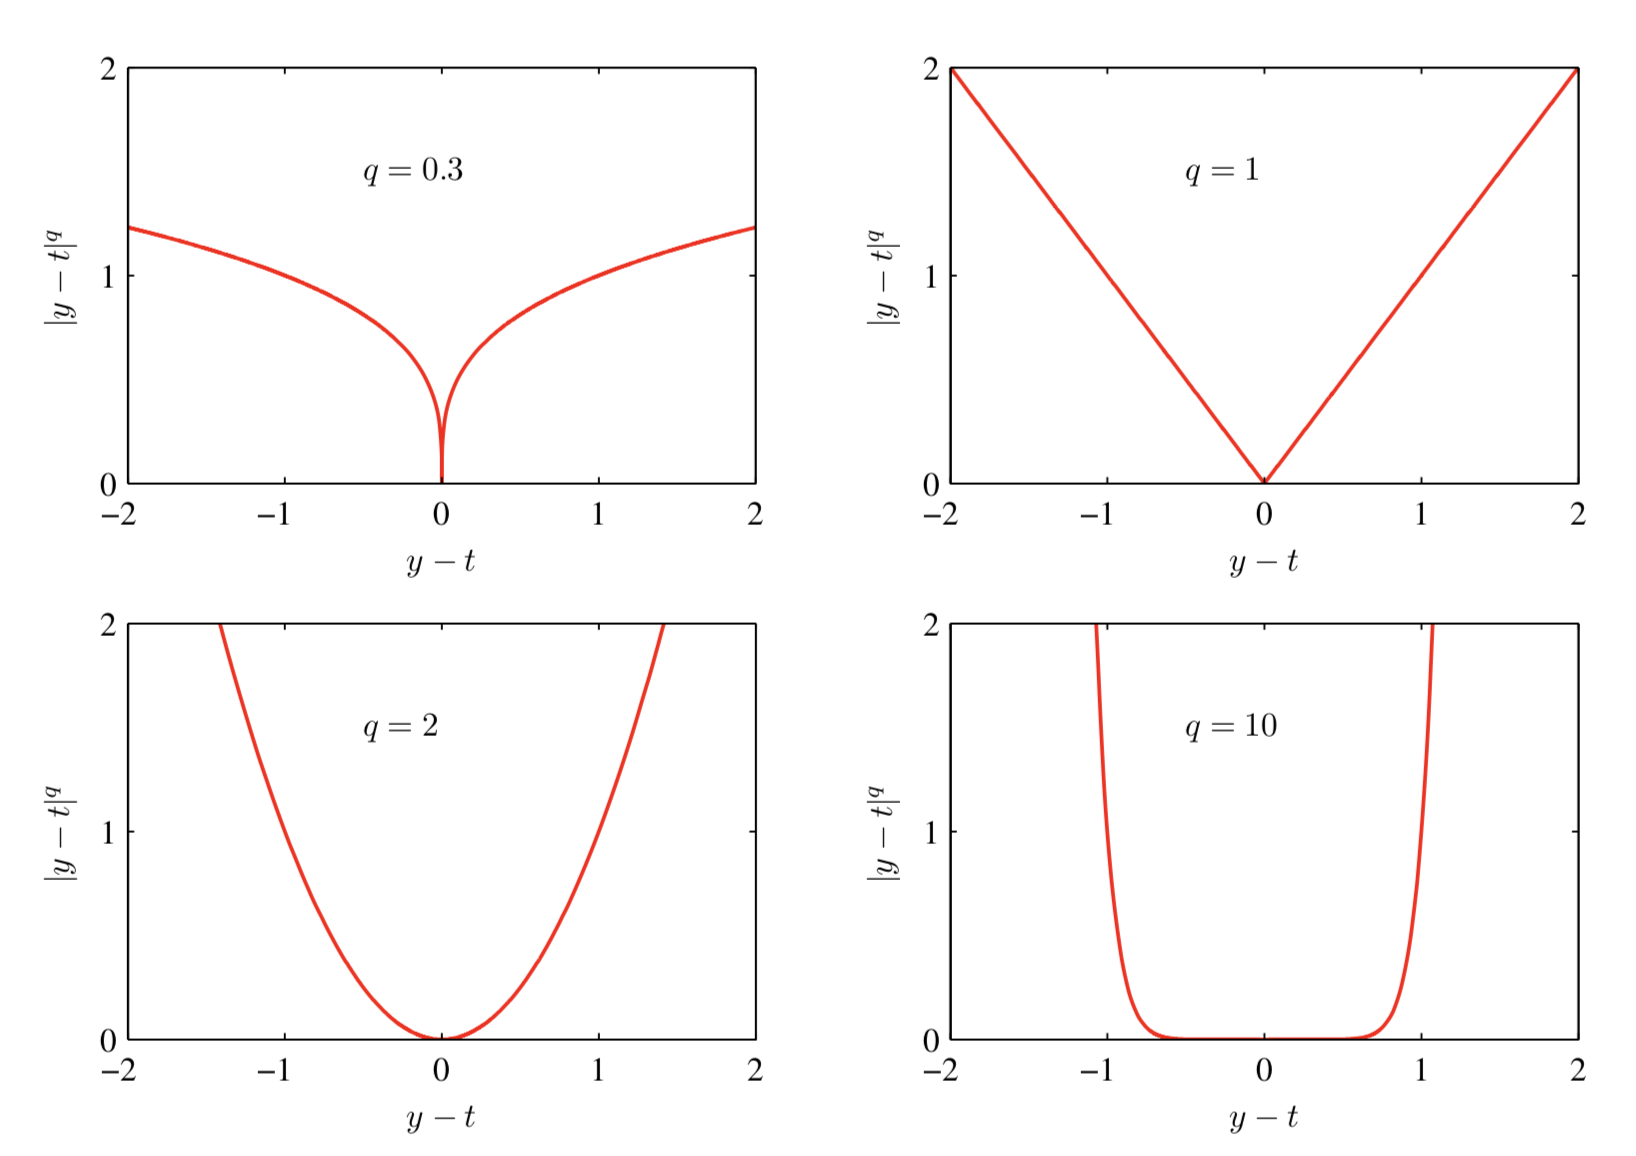

### 1.6 Information Theory

Genral idea of information
<ul>
    <li> Suppose we have a random variable $X$, and we have observed a value from this random varible $x$, we want to know how much information this value contains. In otherwords, the degree of surprise </li>
    <li>If we denote the probability distribution as $p(x)$, the information follows the function $h(x)$ </li>
    <li>If we have observed another value $y$, assume the two observations are unrelated, then intuitively, the information $h(x,y)$ should equal to $h(x) + h(y)$ (in other words, $h(x,y) = h(x) + h(y)$ </li>
    <li>on the other aspect, for two unrelated values, they should be independent, then $p(x,y) = p(x)p(y)$ </li>
    <li>Then the relationship between distribution function and information function will be some logarithm or exponential </li>
</ul>

But there is a second consideration which should be related to the location and the variation of the variable.
<ul>
    <li> Suppose we need to observe a sequence of values from the same system, the first value is $a$, the second value is $a$, until the 1000th value is also $a$, then we may have enough evidence to believe that the next value will also be $a$, which will not provide additional information.</li>
    <li> But after the 999 $a$s, we observed a $b$ in the 1000th trial. Then the only $b$ actually provide a lot information. Especially when the $b$ is very different from $a$. </li>
    <li> With this two examples, we may have a basic understanding that a rarer value from a random variable should contains more information. Since it is harder to be observed, once we have observed it, the observation should be more valuable.</li>
    <li> So the other relationship between $p(x)$ and $h(x)$ should be that once $p(x)$ is big, $h(x)$ should be small.</li>
</ul>
    
Combine this two ideas, we may have $h(x) = -log_2p(x)$. But there is another thinking process based on the binary digits. The details from Shannon’s the information theory (noiseless coding theorem, Shannon, 1948).


More information about information entropy, check the vedio https://www.bilibili.com/video/BV1oX4y1w7aG/?spm_id_from=333.999.0.0&vd_source=2b6aba2bc5d60416dab0bd3687cf8dcf


When we have observed a sample from a population with discrete distribution $p$, the information equation of the distribution could be estimated through
$$H[p] = - \sum_i p(x_i)ln p(x_i)$$
The entropy is nonnegative, it will equal its minimum value of 0 when one of the $p_i = 1$ and all other $p_{j \neq i} = 0$.

The maximum entropy configuration can be found by maximizing $H$ using a Lagrange multiplier to enforce the normalization constraint on the probabilities.

$$\tilde{H} = -\sum_i p(x_i) ln p(x_i) + \lambda (\sum_i p(x_i) - 1)$$

With Jensen's inequality, the solution with the maximum entropy is that for all $i$, $p(x_i) = 1/M$, where $M$ is the total number of categories $x_i$, which means if every category has the same probability to be observed, then this distribution has the biggest information entropy (the distribution is as flat as possible).

To verif that the stationary point is indeed a maximum, we can evaluate the second derivative of the enrtropy, which gives
$$\frac{\partial \widetilde{\mathrm{H}}}{\partial p\left(x_i\right) \partial p\left(x_j\right)}=-I_{i j} \frac{1}{p_i}$$
where $I_{i,j}$ are the elements of the identity matrix.

Then, from the discrete case to the continuous case, we can also find that
$$H[x] = -\int p(x) ln p(x) dx$$

If we follow the three constrains: 
<ul>
    <li>$\int_{-\infty}^\infty p(x)dx = 1$ </li>
    <li>$\int_{-\infty}^\infty xp(x)dx = \mu$ </li>
    <li>$\int_{-\infty}^\infty (x-\mu)^2p(x)dx = \sigma^2$ </li>
</ul>

Then the Lagrange multiplier function we need to maximize is 
$$
\begin{aligned}
& -\int_{-\infty}^{\infty} p(x) \ln p(x) \mathrm{d} x+\lambda_1\left(\int_{-\infty}^{\infty} p(x) \mathrm{d} x-1\right) \\
& +\lambda_2\left(\int_{-\infty}^{\infty} x p(x) \mathrm{d} x-\mu\right)+\lambda_3\left(\int_{-\infty}^{\infty}(x-\mu)^2 p(x) \mathrm{d} x-\sigma^2\right) .
\end{aligned}
$$



Using calculus of variations, the derivvative of this functional to zero giving
$$p(x) = exp(-1 + \lambda_1 + \lambda_2 x + \lambda_3 (x - \mu)^2)$$
since we all terms of $x$ are in the exponential part and we only have first order term and second order term of $x$, the distribution of $p(x)$ must be normal distribution.

But if we fixed on normal distribution, then as $\sigma^2$ increases, the information entropy will also increase. 

$$H[x] = \frac{1}{2} \{1 + ln (2\pi \sigma^2)\}$$

Also, for continuous case, $H[0]$ can be smaller than 0.

If we have a joint distribution $p(x,y)$, when $x$ is known, but $y$ is unknown, then the additional information needed to specify the value of $y$ is given by $- ln p(y|x)$

The average additional information would be
$$H[y|x] = -\int \int p(y,x) ln p(y|x) dy dx$$

which is called the conditional entropy of $y$ given $x$.

It is easy to show that

$$H[x,y] = H[y | x] + H[x]$$

#### 1.6.1 Relative entropy and mutual information

The very important idea of comparing distributions. Because the information entropy could be used to represent the information a distribution contains, then we can conclude that if two distribution are similar, then they should contains similar information, so that their information entropy should be close.

With this idea, we can have the KL divergence. Consider some unknown distribution $p(x)$ that we try to use some known distribution $q(x)$ to approximate. The unknown means that we do not know both the structure of the distribution nor the parameter of $p(x)$, while the known means that we know the structure of the $q(x)$, and we can modify the parameters in $q(x)$ to make it looks like $p(x)$

$$
\begin{aligned}
\mathrm{KL}(p \| q) & =-\int p(\mathbf{x}) \ln q(\mathbf{x}) \mathrm{d} \mathbf{x}-\left(-\int p(\mathbf{x}) \ln p(\mathbf{x}) \mathrm{d} \mathbf{x}\right) \\
& =-\int p(\mathbf{x}) \ln \left\{\frac{q(\mathbf{x})}{p(\mathbf{x})}\right\} \mathrm{d} \mathbf{x} .
\end{aligned}
$$

KL divergence is not symetric $KL(p || q) \neq KL(q || p)$

#### Jensen's Inequality

If $f(x)$ is a convex funciton, then for $0 <\lambda < 1$
$$
f(\lambda a+(1-\lambda) b) \leqslant \lambda f(a)+(1-\lambda) f(b) .
$$

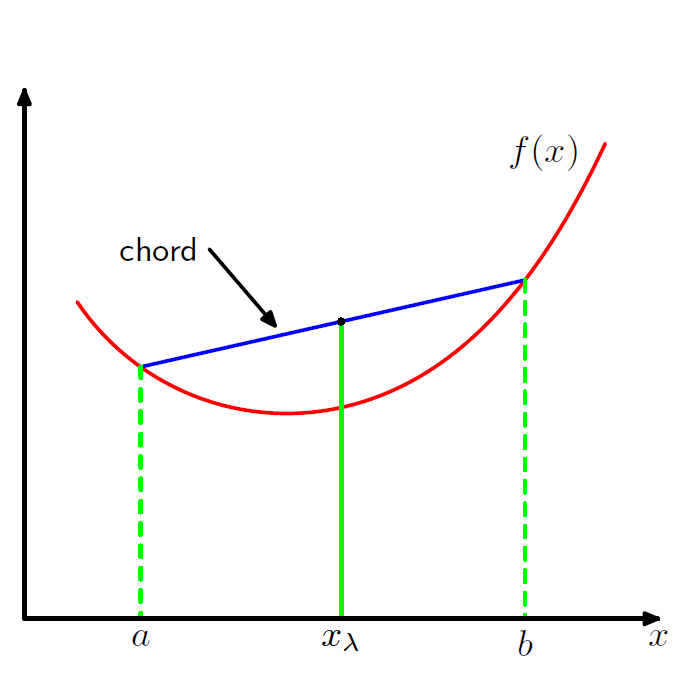

# Question: what is the boundary of the expectation of the log likelihood function, $\mathbb{E}[log\{ L(x,y | \theta )\}]$, when applying Jensen's inequality?